# Getting travel times from station to LSOA

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

In [2]:
# Load the shapefile
lsoa_geom = gpd.read_file("data/LSOA_boundaries.gpkg")

In [3]:
# load shapefile for Local Authority Districts
la_geom = gpd.read_file('data/CMLAD.gpkg')

In [4]:
lsoa_geom.shape

(35672, 9)

<Axes: >

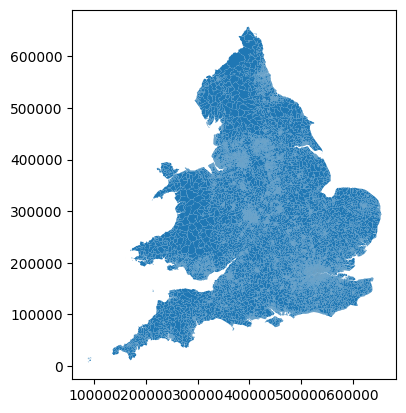

In [5]:
lsoa_geom.plot()

In [6]:
# load the destination matrix
dest_matrix = pd.read_csv("data/rail-stations-travel-times/Stations_PT_Mid.csv")
dest_matrix_hw = pd.read_csv("data/rail-stations-travel-times/Stations_HW_Mid.csv")

# load the lookup table
station_codes = pd.read_csv("data/rail-stations-travel-times/station_codes.csv")

In [7]:
station_codes

UID            StationName   Easting  Northing ORRCategory  DfTflag  \
0    ABD               Aberdeen  394132.0  805809.0           B      1.0   
1    ADV                Andover  435569.0  145979.0           C      0.0   
2    ASI  Ashford International  601152.0  142207.0           B      1.0   
3    BAN                Banbury  446190.0  240450.0           C      0.0   
4    BNG       Bangor (Gwynedd)  257558.0  371623.0           D      0.0   
..   ...                    ...       ...       ...         ...      ...   
180  WVH          Wolverhampton  391960.0  298903.0           B      1.0   
181  WOS   Worcester Shrub Hill  385826.0  255146.0           C      0.0   
182  YRK                   York  459534.0  451611.0           A      1.0   
183  NaN                    NaN       NaN       NaN         NaN      NaN   
184  NaN                    NaN       NaN       NaN         NaN      NaN   

    DfTAggregation  AggregatedPlatforms  
0               No                  5.0  
1               No                  0.0  
2               No                  6.0  
3               No                  0.0  
4               No                  0.0  
..             ...                  ...  
180             No                  6.0  
181             No                  0.0  
182             No                 11.0  
183            NaN                  NaN  
184            NaN                  NaN  

[185 rows x 8 columns]

In [8]:
dest_matrix.head(5)

LSOA_code     RepTime  Percentage Services  uid  NearOrder
0  E01005046   90.572046                   25  LPY         14
1  E01005046   97.759238                   55  CRE         15
2  E01005046  107.559273                   75  SHF         16
3  E01005046  109.839308                   75  LIV         17
4  E01005046  110.339221                   75  LDS         18

In [9]:
dest_matrix_hw.head(5)

LSOA_code     RepTime  Percentage Services  uid  NearOrder
0  E01000058  130.990000                  100  COV         97
1  E01000058  134.593981                  100  SWI         98
2  E01000058  134.990000                  100  LMS         99
3  E01000058  138.593981                  100  NUN        100
4  E01000058  138.593981                  100  SAL        101

In [10]:
dest_time_df = dest_matrix.pivot_table(values = 'RepTime', columns = 'uid', index = 'LSOA_code')

In [11]:
dest_time_hw_df = dest_matrix_hw.pivot_table(values = 'RepTime', columns = 'uid', index = 'LSOA_code')

In [12]:
dest_time_hw_df.index

Index(['E01000001', 'E01000002', 'E01000003', 'E01000004', 'E01000005',
       'E01000006', 'E01000007', 'E01000008', 'E01000009', 'E01000010',
       ...
       'W01001887', 'W01001888', 'W01001889', 'W01001890', 'W01001891',
       'W01001892', 'W01001893', 'W01001894', 'W01001895', 'W01001896'],
      dtype='object', name='LSOA_code', length=34288)

In [13]:
# get the difference between the two travel times
# negative time shows PT is slower, positive means PT is faster
dest_time_diff_df = dest_time_hw_df - dest_time_df

In [14]:
dest_time_df

uid        ABD        ADV        ASI         BAN         BBN         BDI  \
LSOA_code                                                                  
E01000001  NaN  88.754887  56.266364   90.195477  277.515351  173.325727   
E01000002  NaN  91.085753  59.046474   92.806702  279.933950  175.977663   
E01000003  NaN  91.772007  56.792445   90.368353  277.506386  173.498602   
E01000004  NaN  83.227615  56.932102   94.229266  278.600498  177.471134   
E01000005  NaN  93.444905  61.302281   96.850019  288.720031  181.031486   
...        ...        ...        ...         ...         ...         ...   
W01001892  NaN        NaN        NaN  178.043964         NaN         NaN   
W01001893  NaN        NaN        NaN  193.460943         NaN         NaN   
W01001894  NaN        NaN        NaN  188.652287         NaN         NaN   
W01001895  NaN        NaN        NaN  183.403300         NaN         NaN   
W01001896  NaN        NaN        NaN  178.146772         NaN         NaN   

uid              BDM         BFR         BHI         BHM  ...        WGC  \
LSOA_code                                                 ...              
E01000001  52.030315   12.907179   86.496762   98.568769  ...  44.771199   
E01000002  55.551816   16.222242   87.327989  100.726462  ...  42.968948   
E01000003  51.925950   16.305643   86.671160   98.741645  ...  45.670588   
E01000004  54.961242    9.122343   88.720071  101.053700  ...  43.653516   
E01000005  58.720031   10.463273   94.720031  107.720031  ...  50.778640   
...              ...         ...         ...         ...  ...        ...   
W01001892        NaN  180.791987  160.967660  148.279156  ...        NaN   
W01001893        NaN  192.031884  171.948700  160.728420  ...        NaN   
W01001894        NaN  188.533305  170.449636  156.789782  ...        NaN   
W01001895        NaN  184.077943  165.191179  152.790965  ...        NaN   
W01001896        NaN  180.942744  162.742494  149.244189  ...        NaN   

uid               WGN         WIM         WIN         WKF         WNR  \
LSOA_code                                                               
E01000001  130.619570   41.697656   80.293052  133.505562   59.012666   
E01000002  133.037250   43.388641   82.064034  136.437808   62.424572   
E01000003  130.792445   44.611383   82.553647  133.678438   61.054170   
E01000004  134.251603   33.843938   75.465674  138.179891   60.866355   
E01000005  135.720031   46.917839   81.395308  140.156473   66.723877   
...               ...         ...         ...         ...         ...   
W01001892  284.552966  191.950899  176.355820  259.885659  291.199151   
W01001893  289.320013  200.137448  185.688303  267.688303  308.255433   
W01001894  288.800244  197.181647  181.944302  264.567116  302.764912   
W01001895  285.944157  193.854101  177.441616  261.881877  296.769183   
W01001896  286.542959  191.964357  176.545269  261.349836  291.822618   

uid               WOK         WOS         WVH         YRK  
LSOA_code                                                  
E01000001   46.598849  161.571171  111.886768  125.619570  
E01000002   46.346126  160.493426  113.961650  127.174468  
E01000003   48.923801  163.251979  112.059644  125.792445  
E01000004   39.796327  163.474107  115.084914  128.710901  
E01000005   46.917206  170.318733  118.107460  132.720031  
...               ...         ...         ...         ...  
W01001892         NaN  166.732304  173.117126  304.542284  
W01001893         NaN  184.472203  189.498498  310.688303  
W01001894         NaN  167.871934  184.517729  308.209950  
W01001895  228.715452  167.486792  179.435430  304.780965  
W01001896  233.613909  165.196377  172.990604  306.220144  

[34327 rows x 183 columns]

In [15]:
dest_time_diff_df

uid        ABD        ADV        ASI        BAN        BBN        BDI  \
LSOA_code                                                               
E01000001  NaN  18.738864  29.221293  12.405547 -26.282344  55.168024   
E01000002  NaN  17.077479  25.953526  10.176635 -28.120649  52.350146   
E01000003  NaN  15.473345  27.952828  11.747658 -27.261034  54.246671   
E01000004  NaN  21.807697  24.339858   8.732142 -27.027800  49.514648   
E01000005  NaN  17.542596  14.191470  12.882914 -30.745021  42.213866   
...        ...        ...        ...        ...        ...        ...   
W01001892  NaN        NaN        NaN -49.847924        NaN        NaN   
W01001893  NaN        NaN        NaN -66.967192        NaN        NaN   
W01001894  NaN        NaN        NaN -61.456247        NaN        NaN   
W01001895  NaN        NaN        NaN -55.909550        NaN        NaN   
W01001896  NaN        NaN        NaN -50.146772        NaN        NaN   

uid              BDM        BFR        BHI        BHM  ...        WGC  \
LSOA_code                                              ...              
E01000001  48.570709  -6.925925  48.230304  50.664238  ...  20.967903   
E01000002  45.431521  -9.561161  47.818444  49.086838  ...  22.350390   
E01000003  47.940070  -9.560369  47.574191  49.503707  ...  18.574764   
E01000004  46.417354  -5.039250  46.447339  48.518998  ...  21.671878   
E01000005  43.773720  -0.717999  47.012902  48.512668  ...  11.715111   
...              ...        ...        ...        ...  ...        ...   
W01001892        NaN -11.397967 -46.573639 -30.483196  ...        NaN   
W01001893        NaN -24.538133 -59.454949 -44.906860  ...        NaN   
W01001894        NaN -20.337265 -57.253596 -39.789782  ...        NaN   
W01001895        NaN -15.416863 -51.530099 -35.799298  ...        NaN   
W01001896        NaN -11.942744 -48.742494 -32.244189  ...        NaN   

uid              WGN        WIM        WIN        WKF         WNR        WOK  \
LSOA_code                                                                      
E01000001  97.613438   6.155949  28.069747  76.727445    4.481085  27.751533   
E01000002  95.946087   5.603026  27.099198  74.375492    1.738661  29.314955   
E01000003  96.576720   4.133890  25.691704  75.566914    2.191182  26.185923   
E01000004  94.321096  11.397246  30.472162  72.787474    0.168957  32.510062   
E01000005  99.512668   2.069663  30.592194  71.337277    0.263624  30.070295   
...              ...        ...        ...        ...         ...        ...   
W01001892 -88.958985 -36.356919 -59.761839 -47.689619 -167.605171        NaN   
W01001893 -95.658933 -46.476367 -71.027223 -57.525071 -186.594352        NaN   
W01001894 -94.206263 -42.587667 -66.148342 -53.567116 -180.170931        NaN   
W01001895 -91.283076 -39.193020 -61.780535 -50.554068 -174.108102 -94.054372   
W01001896 -91.542959 -36.964357 -60.545269 -49.349836 -168.822618 -98.613909   

uid              WOS        WVH        YRK  
LSOA_code                                   
E01000001  -9.338164  59.216978  98.240242  
E01000002  -7.510089  57.357688  95.486613  
E01000003 -12.006627  58.185708  96.570353  
E01000004 -10.901408  56.291426  94.594315  
E01000005 -11.086034  59.880042  86.267470  
...              ...        ...        ...  
W01001892 -80.138323 -42.921086 -61.346244  
W01001893 -99.978453 -61.170688 -69.525071  
W01001894 -82.277953 -55.321689 -66.209950  
W01001895 -81.825712 -50.107621 -62.453156  
W01001896 -79.196377 -42.990604 -63.424184  

[34377 rows x 183 columns]

In [16]:
station_codes[station_codes['StationName'].fillna('').str.contains('Leeds')]

UID StationName   Easting  Northing ORRCategory  DfTflag DfTAggregation  \
83  LDS       Leeds  429981.0  433239.0           A      1.0             No   

    AggregatedPlatforms  
83                 17.0

In [17]:
# convert to GDF
station_gdf = gpd.GeoDataFrame(
    station_codes,
    geometry = gpd.points_from_xy(station_codes['Easting'], station_codes['Northing']),
    crs = 27700
)

In [18]:
# Spatial join with LSOA
stations_with_lsoa = gpd.sjoin(station_gdf, lsoa_geom[['LSOA21CD','LSOA21NM', 'geometry']], how="left", predicate="intersects")

In [19]:
stations_with_lsoa

UID            StationName   Easting  Northing ORRCategory  DfTflag  \
0    ABD               Aberdeen  394132.0  805809.0           B      1.0   
1    ADV                Andover  435569.0  145979.0           C      0.0   
2    ASI  Ashford International  601152.0  142207.0           B      1.0   
3    BAN                Banbury  446190.0  240450.0           C      0.0   
4    BNG       Bangor (Gwynedd)  257558.0  371623.0           D      0.0   
..   ...                    ...       ...       ...         ...      ...   
180  WVH          Wolverhampton  391960.0  298903.0           B      1.0   
181  WOS   Worcester Shrub Hill  385826.0  255146.0           C      0.0   
182  YRK                   York  459534.0  451611.0           A      1.0   
183  NaN                    NaN       NaN       NaN         NaN      NaN   
184  NaN                    NaN       NaN       NaN         NaN      NaN   

    DfTAggregation  AggregatedPlatforms                       geometry  \
0               No                  5.0  POINT (394132.000 805809.000)   
1               No                  0.0  POINT (435569.000 145979.000)   
2               No                  6.0  POINT (601152.000 142207.000)   
3               No                  0.0  POINT (446190.000 240450.000)   
4               No                  0.0  POINT (257558.000 371623.000)   
..             ...                  ...                            ...   
180             No                  6.0  POINT (391960.000 298903.000)   
181             No                  0.0  POINT (385826.000 255146.000)   
182             No                 11.0  POINT (459534.000 451611.000)   
183            NaN                  NaN                    POINT EMPTY   
184            NaN                  NaN                    POINT EMPTY   

     index_right   LSOA21CD            LSOA21NM  
0            NaN        NaN                 NaN  
1        22003.0  E01023179    Test Valley 004A  
2        32980.0  E01034986        Ashford 005G  
3        31207.0  E01032942       Cherwell 004H  
4        33804.0  W01000062        Gwynedd 001A  
..           ...        ...                 ...  
180      32351.0  E01034313  Wolverhampton 020H  
181      30659.0  E01032305      Worcester 010A  
182      12743.0  E01013416           York 013E  
183          NaN        NaN                 NaN  
184          NaN        NaN                 NaN  

[185 rows x 12 columns]

In [20]:
# # Ensure CRS matches for spatial join
# station_gdf = station_gdf.set_crs(lsoa_geom.crs, allow_override=True)
# station_gdf = station_gdf.set_crs(la_geom.crs, allow_override=True)

# Spatial join with LSOA
stations_with_lsoa = gpd.sjoin(station_gdf, lsoa_geom[['LSOA21CD','LSOA21NM', 'geometry']], how="left", predicate="intersects").drop(columns=['index_right'])

# Spatial join with LA
stations_with_la = gpd.sjoin(stations_with_lsoa, la_geom[['cmlad11cd', 'cmlad11nm', 'geometry']], how="left", predicate="intersects").drop(columns=['index_right'])


In [21]:
stations_with_la_extract = stations_with_la.dropna(subset=['LSOA21CD', 'cmlad11cd'])

In [22]:
stations_with_la_extract

UID               StationName   Easting  Northing ORRCategory  DfTflag  \
1    ADV                   Andover  435569.0  145979.0           C      0.0   
2    ASI     Ashford International  601152.0  142207.0           B      1.0   
3    BAN                   Banbury  446190.0  240450.0           C      0.0   
4    BNG          Bangor (Gwynedd)  257558.0  371623.0           D      0.0   
5    BKG                   Barking  544433.0  184327.0           B      1.0   
..   ...                       ...       ...       ...         ...      ...   
178  WNR  Windsor & Eton Riverside  496913.0  177294.0           C      0.0   
179  WOK                    Woking  500658.0  158693.0           B      1.0   
180  WVH             Wolverhampton  391960.0  298903.0           B      1.0   
181  WOS      Worcester Shrub Hill  385826.0  255146.0           C      0.0   
182  YRK                      York  459534.0  451611.0           A      1.0   

    DfTAggregation  AggregatedPlatforms                       geometry  \
1               No                  0.0  POINT (435569.000 145979.000)   
2               No                  6.0  POINT (601152.000 142207.000)   
3               No                  0.0  POINT (446190.000 240450.000)   
4               No                  0.0  POINT (257558.000 371623.000)   
5               No                  5.0  POINT (544433.000 184327.000)   
..             ...                  ...                            ...   
178             No                  0.0  POINT (496913.000 177294.000)   
179             No                  5.0  POINT (500658.000 158693.000)   
180             No                  6.0  POINT (391960.000 298903.000)   
181             No                  0.0  POINT (385826.000 255146.000)   
182             No                 11.0  POINT (459534.000 451611.000)   

      LSOA21CD                     LSOA21NM  cmlad11cd               cmlad11nm  
1    E01023179             Test Valley 004A  E41000125             Test Valley  
2    E01034986                 Ashford 005G  E41000137                 Ashford  
3    E01032942                Cherwell 004H  E41000203                Cherwell  
4    W01000062                 Gwynedd 001A  W40000002                 Gwynedd  
5    E01000007    Barking and Dagenham 015A  E41000293    Barking and Dagenham  
..         ...                          ...        ...                     ...  
178  E01016567  Windsor and Maidenhead 010B  E41000040  Windsor and Maidenhead  
179  E01034294                  Woking 008F  E41000238                  Woking  
180  E01034313           Wolverhampton 020H  E41000287           Wolverhampton  
181  E01032305               Worcester 010A  E41000254               Worcester  
182  E01013416                    York 013E  E41000014                    York  

[175 rows x 13 columns]

In [23]:
duration_df = lsoa_geom.merge(
    dest_time_df,
    left_on='LSOA21CD',
    right_on='LSOA_code',
    how='left'
)

In [24]:
duration_hw_df = lsoa_geom.merge(
    dest_time_hw_df,
    left_on='LSOA21CD',
    right_on='LSOA_code',
    how='left'
)

duration_diff_df = lsoa_geom.merge(
    dest_time_diff_df,
    left_on='LSOA21CD',
    right_on='LSOA_code',
    how='left'
)

In [25]:
station_gdf

UID            StationName   Easting  Northing ORRCategory  DfTflag  \
0    ABD               Aberdeen  394132.0  805809.0           B      1.0   
1    ADV                Andover  435569.0  145979.0           C      0.0   
2    ASI  Ashford International  601152.0  142207.0           B      1.0   
3    BAN                Banbury  446190.0  240450.0           C      0.0   
4    BNG       Bangor (Gwynedd)  257558.0  371623.0           D      0.0   
..   ...                    ...       ...       ...         ...      ...   
180  WVH          Wolverhampton  391960.0  298903.0           B      1.0   
181  WOS   Worcester Shrub Hill  385826.0  255146.0           C      0.0   
182  YRK                   York  459534.0  451611.0           A      1.0   
183  NaN                    NaN       NaN       NaN         NaN      NaN   
184  NaN                    NaN       NaN       NaN         NaN      NaN   

    DfTAggregation  AggregatedPlatforms                       geometry  
0               No                  5.0  POINT (394132.000 805809.000)  
1               No                  0.0  POINT (435569.000 145979.000)  
2               No                  6.0  POINT (601152.000 142207.000)  
3               No                  0.0  POINT (446190.000 240450.000)  
4               No                  0.0  POINT (257558.000 371623.000)  
..             ...                  ...                            ...  
180             No                  6.0  POINT (391960.000 298903.000)  
181             No                  0.0  POINT (385826.000 255146.000)  
182             No                 11.0  POINT (459534.000 451611.000)  
183            NaN                  NaN                    POINT EMPTY  
184            NaN                  NaN                    POINT EMPTY  

[185 rows x 9 columns]

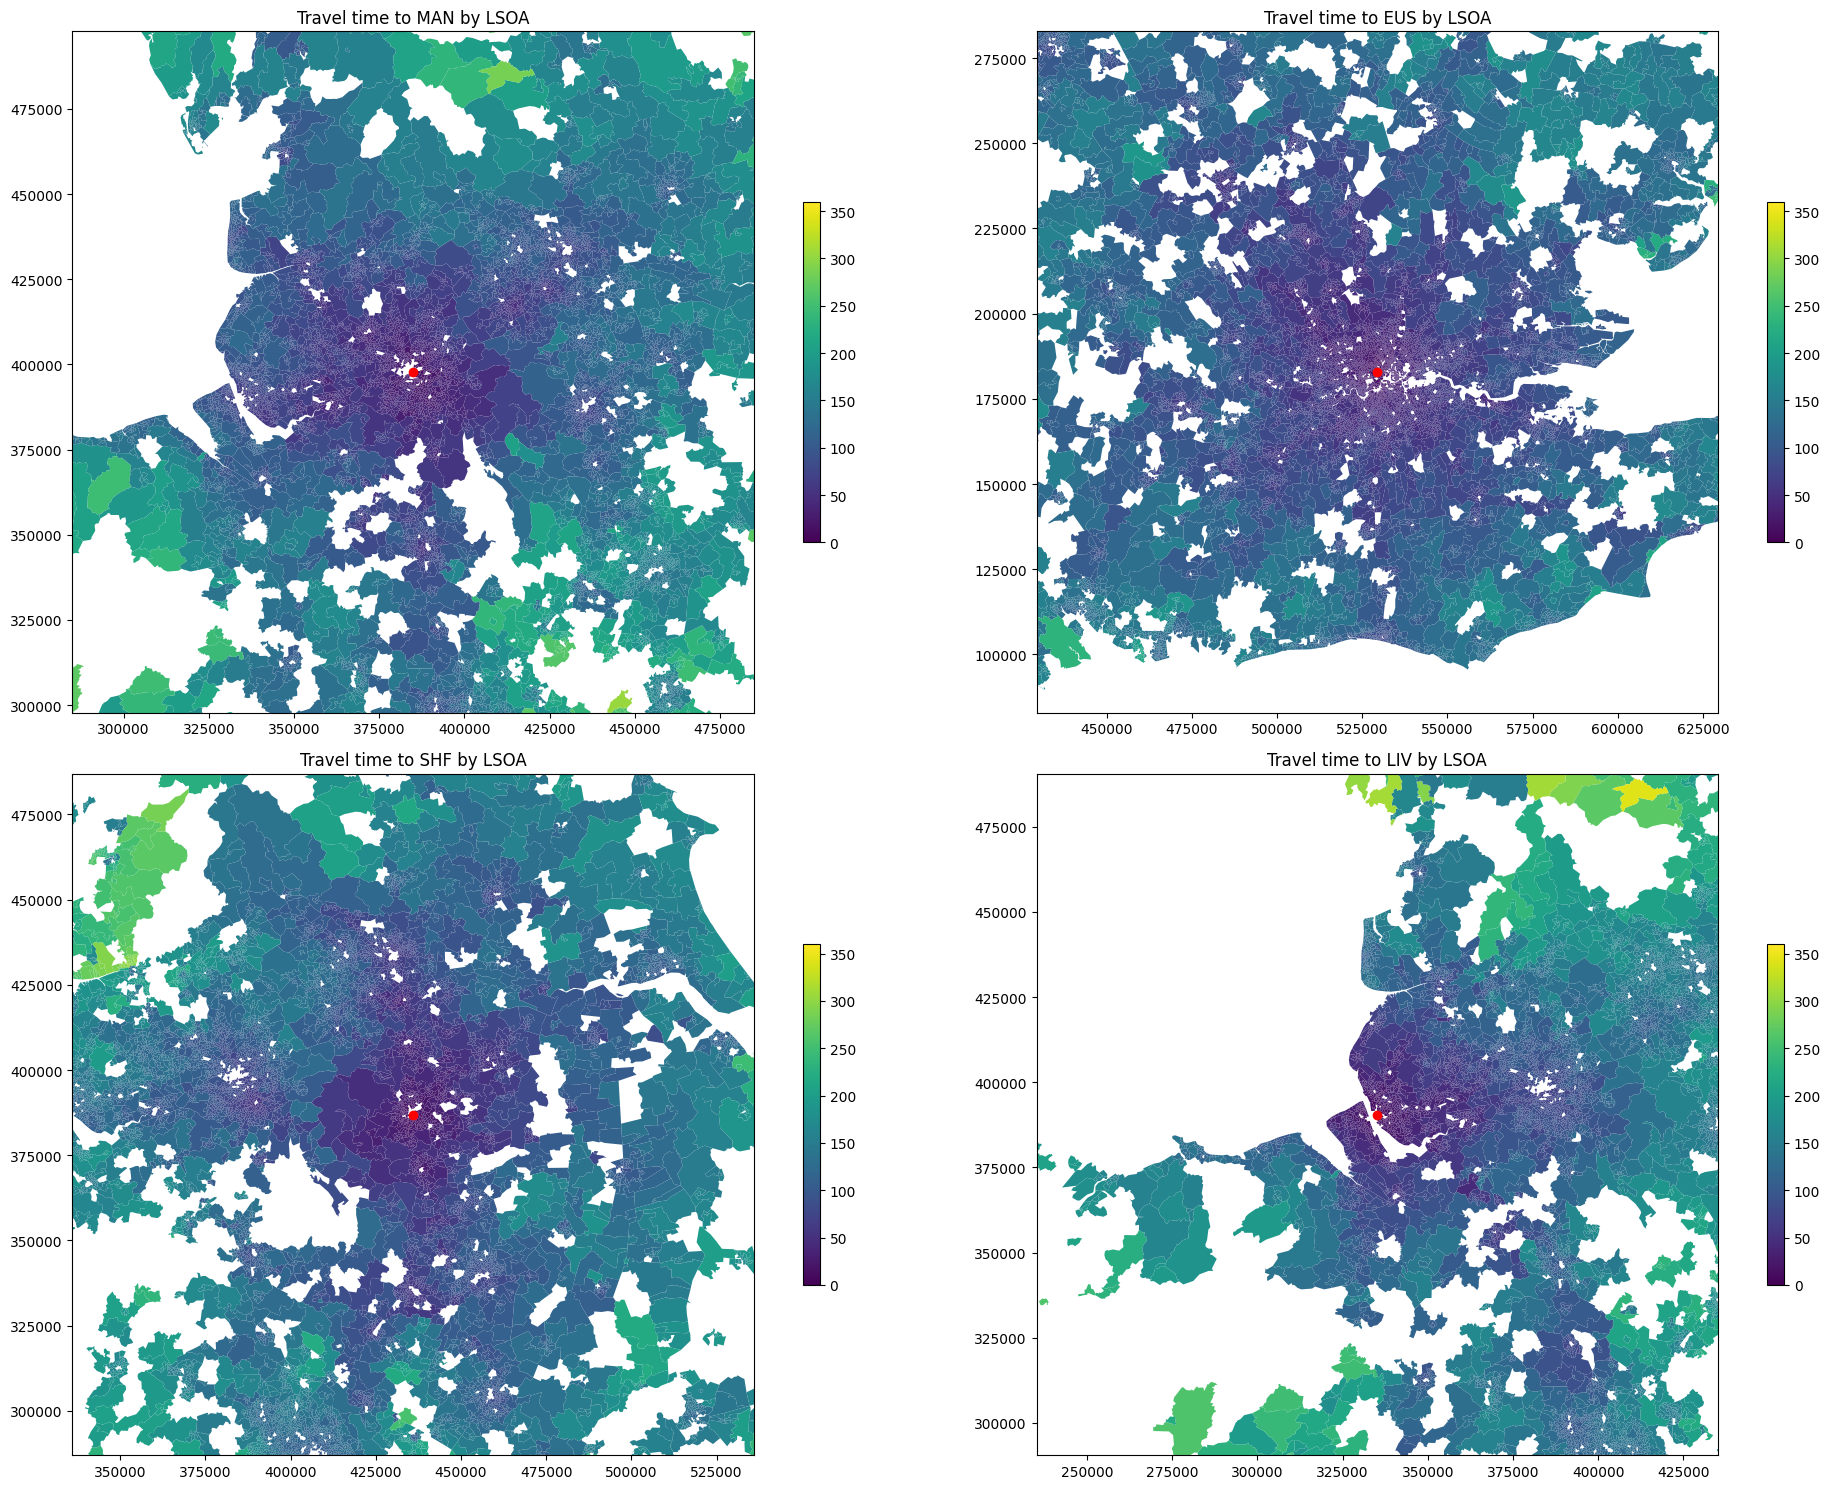

In [26]:
# Define station codes
station_codes_list = ['MAN', 'EUS', 'SHF', 'LIV']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))  # 2x2 grid of subplots
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Buffer distance (200 km in meters)
buffer = 100 * 1000

# Loop through station codes and plot
for i, code_temp in enumerate(station_codes_list):
    ax = axes[i]
    
    # Filter the station
    station_geom = station_gdf[station_gdf['UID'] == code_temp]
    if station_geom.empty:
        print(f"Station with UID '{code_temp}' not found.")
        continue
    
    # Get station coordinates
    station_point = station_geom.geometry.iloc[0]
    station_x, station_y = station_point.x, station_point.y
    
    # Define the extent
    extent = [
        station_x - buffer,  # min x
        station_x + buffer,  # max x
        station_y - buffer,  # min y
        station_y + buffer   # max y
    ]
    
    # Plot the travel time data
    duration_df.plot(
        column=code_temp,
        legend=True,
        ax=ax,
        vmin=0,
        vmax=360,
        legend_kwds={'shrink': 0.5}  # Adjust legend size
    )
    
    # Plot the station point
    station_geom.plot(
        ax=ax,
        color='red',
    )
    
    # Set extent
    ax.set_xlim(extent[0], extent[1])
    ax.set_ylim(extent[2], extent[3])
    
    # Set title
    ax.set_title(f'Travel time to {code_temp} by LSOA')

# Adjust layout
plt.tight_layout()
plt.show()

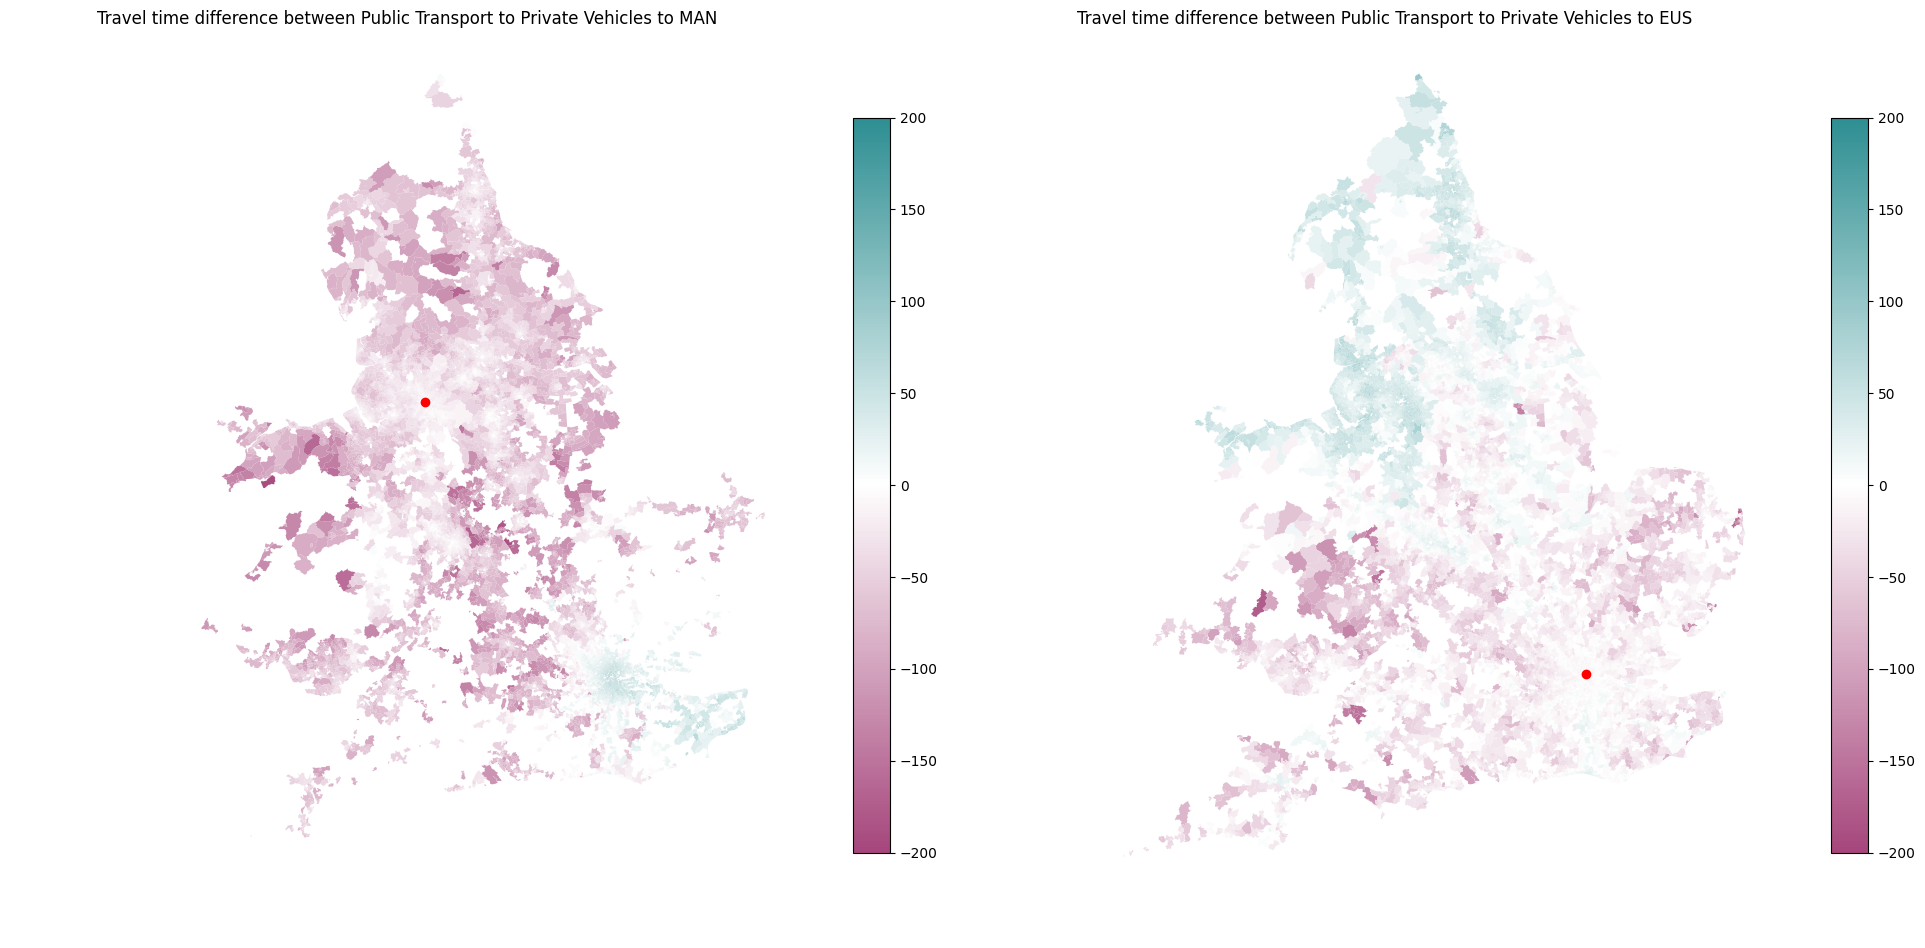

In [28]:
from matplotlib.colors import LinearSegmentedColormap

# Define station codes
station_codes_list = ['MAN', 'EUS']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 15))  # 2x2 grid of subplots
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Buffer distance (400 km in meters)
buffer = 400 * 1000

# Define a custom diverging colormap

colors = ['#a6467c', '#ffffff', '#2d8e92']
custom_cmap = LinearSegmentedColormap.from_list('custom_diverging', colors)

# Loop through station codes and plot
for i, code_temp in enumerate(station_codes_list):
    ax = axes[i]
    
    # Filter the station
    station_geom = station_gdf[station_gdf['UID'] == code_temp]
    if station_geom.empty:
        print(f"Station with UID '{code_temp}' not found.")
        continue
    
    # Get station coordinates
    station_point = station_geom.geometry.iloc[0]
    station_x, station_y = station_point.x, station_point.y
    
    # Define the extent
    extent = [
        station_x - buffer,  # min x
        station_x + buffer,  # max x
        station_y - buffer,  # min y
        station_y + buffer   # max y
    ]

    # Plot the LSOA boundaries
    lsoa_geom.plot(ax=ax, color='white')
    
    # Plot the travel time data
    duration_diff_df.plot(
        column=code_temp,
        legend=True,
        ax=ax,
        vmin=-200,
        vmax=200,
        cmap = custom_cmap,  # Use a diverging colormap for differences
        legend_kwds={'shrink': 0.5}  # Adjust legend size
    )
    
    # Plot the station point
    station_geom.plot(
        ax=ax,
        color='red',
    )
    
    # Set extent
    # ax.set_xlim(extent[0], extent[1])
    # ax.set_ylim(extent[2], extent[3])
    
    # Set title
    ax.set_title(f'Travel time difference between Public Transport to Private Vehicles to {code_temp}')

    ax.set_axis_off()  # Hide the axis for better visualization

# Adjust layout
plt.tight_layout()
plt.savefig("map/travel_time_diff_transparent.png", dpi=300, bbox_inches='tight', transparent=True)
# plt.savefig("map/travel_time_diff.png", dpi=300, bbox_inches='tight')
# plt.savefig("map/travel_time_diff.svg", format = 'svg')

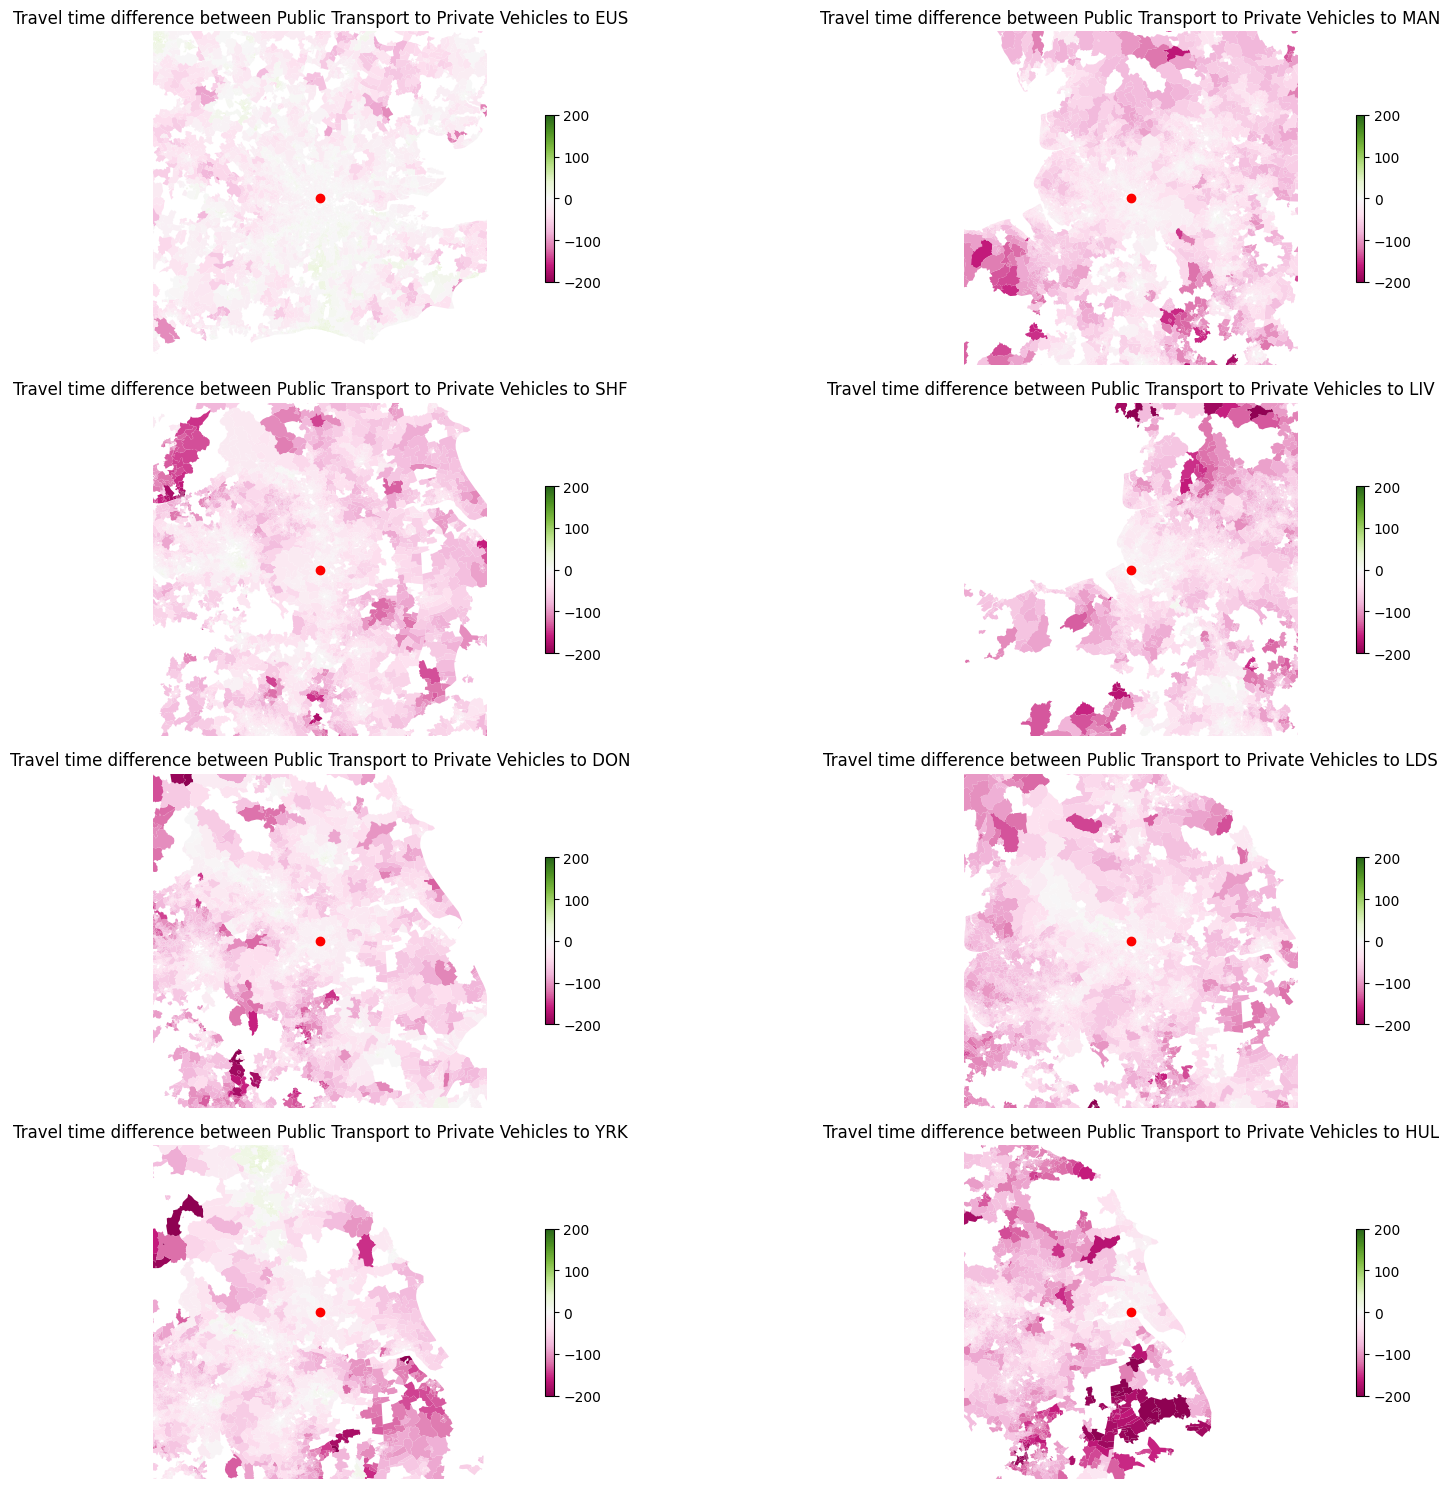

In [33]:
# Define station codes
station_codes_list = ['EUS', 'MAN', 'SHF', 'LIV', 'DON', 'LDS', 'YRK', 'HUL']

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 15))  # 2x2 grid of subplots
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Buffer distance (300 km in meters)
buffer = 100 * 1000

# Loop through station codes and plot
for i, code_temp in enumerate(station_codes_list):
    ax = axes[i]
    
    # Filter the station
    station_geom = station_gdf[station_gdf['UID'] == code_temp]
    if station_geom.empty:
        print(f"Station with UID '{code_temp}' not found.")
        continue
    
    # Get station coordinates
    station_point = station_geom.geometry.iloc[0]
    station_x, station_y = station_point.x, station_point.y
    
    # Define the extent
    extent = [
        station_x - buffer,  # min x
        station_x + buffer,  # max x
        station_y - buffer,  # min y
        station_y + buffer   # max y
    ]
    
    # Plot the travel time data
    duration_diff_df.plot(
        column=code_temp,
        legend=True,
        ax=ax,
        vmin=-200,
        vmax=200,
        cmap='PiYG',  # Use a diverging colormap for differences
        legend_kwds={'shrink': 0.5}  # Adjust legend size
    )
    
    # Plot the station point
    station_geom.plot(
        ax=ax,
        color='red',
    )
    
    # Set extent
    ax.set_xlim(extent[0], extent[1])
    ax.set_ylim(extent[2], extent[3])
    
    # Set title
    ax.set_title(f'Travel time difference between Public Transport to Private Vehicles to {code_temp}')

    ax.set_axis_off()  # Hide the axis for better visualization

# Adjust layout
plt.tight_layout()
plt.show()

## Comparing the Share of Public Transport to Time Difference

In [58]:
od_matrix = pd.read_csv('data/od_matrix_pivot.csv')

In [90]:
stations_with_la_extract.head(5)

UID            StationName   Easting  Northing ORRCategory  DfTflag  \
1  ADV                Andover  435569.0  145979.0           C      0.0   
2  ASI  Ashford International  601152.0  142207.0           B      1.0   
3  BAN                Banbury  446190.0  240450.0           C      0.0   
4  BNG       Bangor (Gwynedd)  257558.0  371623.0           D      0.0   
5  BKG                Barking  544433.0  184327.0           B      1.0   

  DfTAggregation  AggregatedPlatforms                       geometry  \
1             No                  0.0  POINT (435569.000 145979.000)   
2             No                  6.0  POINT (601152.000 142207.000)   
3             No                  0.0  POINT (446190.000 240450.000)   
4             No                  0.0  POINT (257558.000 371623.000)   
5             No                  5.0  POINT (544433.000 184327.000)   

    LSOA21CD                   LSOA21NM  cmlad11cd             cmlad11nm  
1  E01023179           Test Valley 004A  E41000125           Test Valley  
2  E01034986               Ashford 005G  E41000137               Ashford  
3  E01032942              Cherwell 004H  E41000203              Cherwell  
4  W01000062               Gwynedd 001A  W40000002               Gwynedd  
5  E01000007  Barking and Dagenham 015A  E41000293  Barking and Dagenham

In [91]:
from itertools import product

# Extract station UIDs and names
stations = stations_with_la_extract[['UID', 'StationName', 'LSOA21CD', 'cmlad11cd', 'ORRCategory']].dropna()

# Create all combinations of origin and destination
od_combinations = pd.DataFrame(
    list(product(stations['UID'], stations['UID'])),
    columns=['origin_UID', 'destination_UID']
)

# Merge to get origin and destination station names
od_combinations = od_combinations.merge(
    stations.rename(columns={'UID': 'origin_UID', 'StationName': 'origin_name', 'LSOA21CD': 'origin_LSOA', 'cmlad11cd': 'origin_LA', 'ORRCategory': 'origin_cat'}),
    on='origin_UID'
).merge(
    stations.rename(columns={'UID': 'destination_UID', 'StationName': 'destination_name', 'LSOA21CD': 'destination_LSOA', 'cmlad11cd': 'destination_LA', 'ORRCategory': 'destination_cat'}),
    on='destination_UID'
)

od_combinations

origin_UID destination_UID               origin_name origin_LSOA  \
0            ADV             ADV                   Andover   E01023179   
1            ASI             ADV     Ashford International   E01034986   
2            BAN             ADV                   Banbury   E01032942   
3            BNG             ADV          Bangor (Gwynedd)   W01000062   
4            BKG             ADV                   Barking   E01000007   
...          ...             ...                       ...         ...   
30620        WNR             YRK  Windsor & Eton Riverside   E01016567   
30621        WOK             YRK                    Woking   E01034294   
30622        WVH             YRK             Wolverhampton   E01034313   
30623        WOS             YRK      Worcester Shrub Hill   E01032305   
30624        YRK             YRK                      York   E01013416   

       origin_LA origin_cat destination_name destination_LSOA destination_LA  \
0      E41000125          C          Andover        E01023179      E41000125   
1      E41000137          B          Andover        E01023179      E41000125   
2      E41000203          C          Andover        E01023179      E41000125   
3      W40000002          D          Andover        E01023179      E41000125   
4      E41000293          B          Andover        E01023179      E41000125   
...          ...        ...              ...              ...            ...   
30620  E41000040          C             York        E01013416      E41000014   
30621  E41000238          B             York        E01013416      E41000014   
30622  E41000287          B             York        E01013416      E41000014   
30623  E41000254          C             York        E01013416      E41000014   
30624  E41000014          A             York        E01013416      E41000014   

      destination_cat  
0                   C  
1                   C  
2                   C  
3                   C  
4                   C  
...               ...  
30620               A  
30621               A  
30622               A  
30623               A  
30624               A  

[30625 rows x 10 columns]

In [92]:
od_durations = od_combinations.merge(
    dest_matrix[['LSOA_code', 'uid', 'RepTime']].rename(columns = {'LSOA_code': 'origin_LSOA', 'uid': 'destination_UID', 'RepTime': 'pt_duration'}),
    on = ['origin_LSOA', 'destination_UID'], 
    how = 'left'
).merge(
    dest_matrix_hw[['LSOA_code', 'uid', 'RepTime']].rename(columns = {'LSOA_code': 'origin_LSOA', 'uid': 'destination_UID', 'RepTime': 'car_duration'}),
    on = ['origin_LSOA', 'destination_UID'], 
    how = 'left'    
)

In [93]:
# calculate difference between car and public transport durations
# negative time shows PT is slower, positive means PT is faster
od_durations['time_difference'] = od_durations['car_duration'] - od_durations['pt_duration']
od_durations['time_ratio'] = od_durations['pt_duration'] / od_durations['car_duration']

In [94]:
# calculate the share of each mode of transport
od_durations = od_durations.merge(
    od_matrix[['origin_code', 'destination_code', 'pt_share', 'private_share']].rename(columns = {'origin_code': 'origin_LA', 'destination_code': 'destination_LA'}),
    on = ['origin_LA', 'destination_LA'],
    how = 'left'
)

In [144]:
od_durations['time_difference_hours'] = od_durations['time_difference'] / 60

In [148]:
od_durations.to_csv('data/od_durations.csv', index = False)

In [146]:
large_stations = [
    'Liverpool Lime Street (High Level)', 'London Euston', 'London Paddington', 
    'London Liverpool Street', 'Manchester Piccadilly', 'Leeds', 'Birmingham New Street', 'Sheffield', 'York',
    'Hull', 'Doncaster', 'Glasgow Central', 'Edinburgh Waverley', 'Aberdeen', 'Inverness',
    'Bristol Temple Meads', 'Cardiff Central', 'Brighton', 'Southampton Central', 'Nottingham', 'Leicester', 
    'Reading', 'Oxford', 'Cambridge', 'Exeter St Davids', 'Newcastle', 
]

[station for station in large_stations if station not in station_gdf['StationName'].values]


[]

R2 value: 0.1317


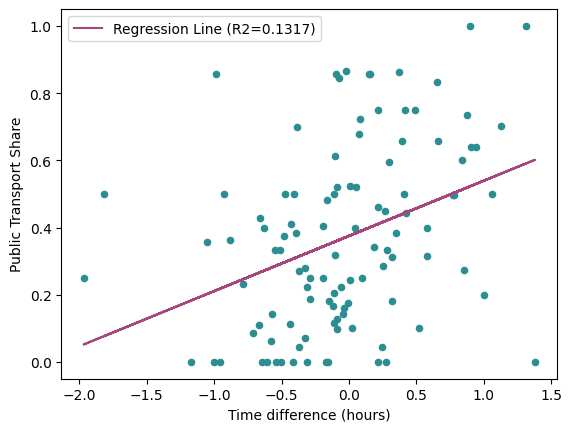

In [156]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

od_durations[od_durations['origin_name'].isin(large_stations) & od_durations['destination_name'].isin(large_stations)].plot.scatter(
    x = 'time_difference_hours',
    y = 'pt_share',
    xlabel = 'Time difference (hours)',
    ylabel = 'Public Transport Share',
    color = '#2d8e92'
)
# Drop rows with NaN values in the relevant columns
filtered_data = od_durations[od_durations['origin_name'].isin(large_stations) & od_durations['destination_name'].isin(large_stations)].dropna(subset=['time_difference_hours', 'pt_share'])

# Extract x and y values
x = filtered_data['time_difference_hours'].values.reshape(-1, 1)
y = filtered_data['pt_share'].values

# Fit the regression model
model = LinearRegression()
model.fit(x, y)

# Predict y values
y_pred = model.predict(x)

# Calculate R2 value
r2 = r2_score(y, y_pred)
print(f"R2 value: {r2:.4f}")

# Plot the regression line
plt.plot(filtered_data['time_difference_hours'], y_pred, color='#a6467c', label=f'Regression Line (R2={r2:.4f})')
plt.legend()

# Save the figure as an SVG file
plt.savefig("scatter_plot_with_regression.svg", format="svg")



In [161]:
# Get the slope (incline) of the model
slope = model.coef_[0]
print(f"Slope (Incline) of the model: {slope}")

Slope (Incline) of the model: 0.16424726424836505


In [150]:
available_fonts = [f.name for f in fm.fontManager.ttflist]

## Travel Time between Stations



In [ ]:
import xmltodict

# Load the XML file
with open("data/PPTimetable.xml", "r") as file:
    pptimetable_data = xmltodict.parse(file.read())


In [ ]:
with open("data/StationsRefData_v1.2.xml", "r", encoding = 'utf-8') as file:
    ref_data = xmltodict.parse(file.read())

In [ ]:
station_codes

UID            StationName   Easting  Northing ORRCategory  DfTflag  \
0    ABD               Aberdeen  394132.0  805809.0           B      1.0   
1    ADV                Andover  435569.0  145979.0           C      0.0   
2    ASI  Ashford International  601152.0  142207.0           B      1.0   
3    BAN                Banbury  446190.0  240450.0           C      0.0   
4    BNG       Bangor (Gwynedd)  257558.0  371623.0           D      0.0   
..   ...                    ...       ...       ...         ...      ...   
180  WVH          Wolverhampton  391960.0  298903.0           B      1.0   
181  WOS   Worcester Shrub Hill  385826.0  255146.0           C      0.0   
182  YRK                   York  459534.0  451611.0           A      1.0   
183  NaN                    NaN       NaN       NaN         NaN      NaN   
184  NaN                    NaN       NaN       NaN         NaN      NaN   

    DfTAggregation  AggregatedPlatforms  
0               No                  5.0  
1               No                  0.0  
2               No                  6.0  
3               No                  0.0  
4               No                  0.0  
..             ...                  ...  
180             No                  6.0  
181             No                  0.0  
182             No                 11.0  
183            NaN                  NaN  
184            NaN                  NaN  

[185 rows x 8 columns]

In [ ]:
ref_data['StationsReferenceData']['Station']

[{'Nlc': '0027',
  'Name': 'Trvcard 1',
  'Tiploc': None,
  'CRS': None,
  'OJPEnabled': 'false',
  'DarwinEnabled': 'false',
  'KBEnabled': 'false',
  'OJPDisplayName': None,
  'OJPAdviceMessage': None,
  'RSPDisplayName': None,
  'AttendedTIS': 'true',
  'UnattendedTIS': 'true'},
 {'Nlc': '0028',
  'Name': 'Trvcard 2',
  'Tiploc': None,
  'CRS': None,
  'OJPEnabled': 'false',
  'DarwinEnabled': 'false',
  'KBEnabled': 'false',
  'OJPDisplayName': None,
  'OJPAdviceMessage': None,
  'RSPDisplayName': None,
  'AttendedTIS': 'true',
  'UnattendedTIS': 'true'},
 {'Nlc': '0029',
  'Name': 'Trvcard 3',
  'Tiploc': None,
  'CRS': None,
  'OJPEnabled': 'false',
  'DarwinEnabled': 'false',
  'KBEnabled': 'false',
  'OJPDisplayName': None,
  'OJPAdviceMessage': None,
  'RSPDisplayName': None,
  'AttendedTIS': 'true',
  'UnattendedTIS': 'true'},
 {'Nlc': '0030',
  'Name': 'Trvcard 4',
  'Tiploc': None,
  'CRS': None,
  'OJPEnabled': 'false',
  'DarwinEnabled': 'false',
  'KBEnabled': 'false',
 

In [ ]:
pptimetable_data['PportTimetable']['Journey']

[{'@rid': '202504088611000',
  '@uid': 'V11000',
  '@trainId': '5Q54',
  '@ssd': '2025-04-08',
  '@toc': 'GW',
  '@status': '1',
  '@trainCat': 'EE',
  '@isPassengerSvc': 'false',
  'OPOR': {'@tpl': 'GFORD', '@act': 'TB', '@wtd': '14:41'},
  'PP': {'@tpl': 'GFORDSJ', '@wtp': '14:44'},
  'OPIP': [{'@tpl': 'SGFORD', '@act': 'OP', '@wta': '14:45', '@wtd': '14:45'},
   {'@tpl': 'CBARPAR', '@act': 'OP', '@wta': '14:47', '@wtd': '14:47'},
   {'@tpl': 'DRAYGRN', '@act': 'OP', '@wta': '14:49', '@wtd': '14:49'}],
  'OPDT': {'@tpl': 'WEALING', '@act': 'TF', '@plat': '5', '@wta': '14:52'}},
 {'@rid': '202504086745832',
  '@uid': 'C45832',
  '@trainId': '5H06',
  '@ssd': '2025-04-08',
  '@toc': 'HT',
  '@trainCat': 'EE',
  '@isPassengerSvc': 'false',
  'OPOR': {'@tpl': 'BEVERLY', '@act': 'TB', '@plat': '2', '@wtd': '21:56'},
  'OPDT': {'@tpl': 'HULLSS', '@act': 'TF', '@wta': '22:08'}},
 {'@rid': '202504098013611',
  '@uid': 'P13611',
  '@trainId': '5S21',
  '@ssd': '2025-04-09',
  '@toc': 'TP',
  